In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import dump
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score


In [6]:
diabetes=pd.read_csv("diabetes.csv")
type(diabetes)

pandas.core.frame.DataFrame

In [7]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
diabetes.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

<Axes: xlabel='Pregnancies', ylabel='Outcome'>

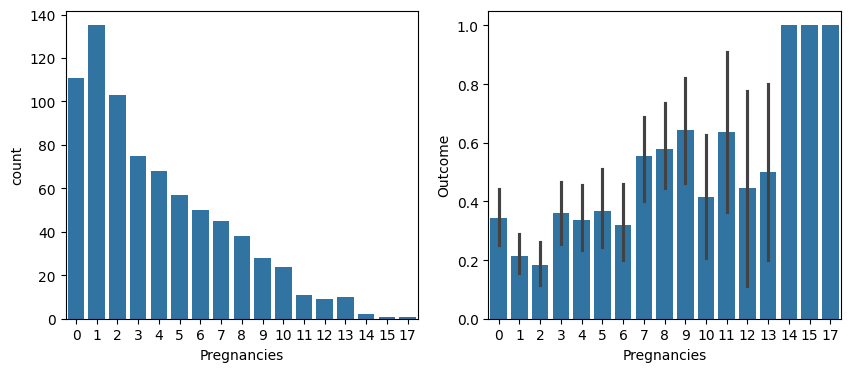

In [11]:
fig,axes=plt.subplots(1, 2, figsize=(10,4))

sns.countplot(x='Pregnancies',data=diabetes,ax=axes[0])
sns.barplot(x='Pregnancies', y='Outcome',data=diabetes,ax=axes[1])


<Axes: >

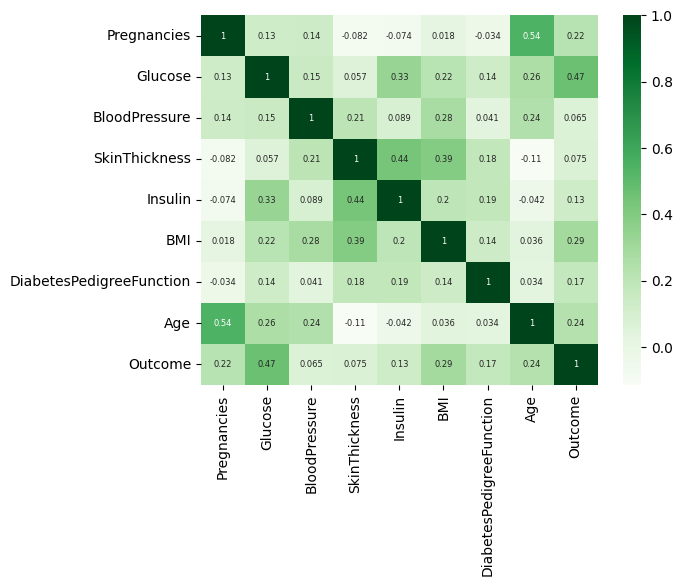

In [12]:
sns.heatmap(diabetes.corr(),cbar=True, cmap='Greens', annot=True, annot_kws={'size' : 6})

In [13]:
#MAKING A NEW DATASET WITH EQUAL OUTPUTS FOR DIABETES AND NO DIABETES
diabetic=diabetes[diabetes.Outcome==1]
non_diabetic=diabetes[diabetes.Outcome==0]

In [14]:
non_diabetic=non_diabetic.sample(n=268)

In [15]:
new_diabetes_data=pd.concat([diabetic,non_diabetic])

In [16]:
new_diabetes_data=new_diabetes_data.sample(frac=1).reset_index(drop=True)

In [17]:
new_diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,109,60,27,0,25.0,0.206,27,0
1,12,151,70,40,271,41.8,0.742,38,1
2,2,92,76,20,0,24.2,1.698,28,0
3,2,128,78,37,182,43.3,1.224,31,1
4,6,147,80,0,0,29.5,0.178,50,1


In [18]:
new_diabetes_data.Outcome.value_counts()

Outcome
0    268
1    268
Name: count, dtype: int64

In [19]:
X=new_diabetes_data.drop(columns='Outcome', axis=1)

In [20]:
Y=new_diabetes_data.Outcome

In [21]:
#STANDARDIZING THE DATA
scaler=StandardScaler()

In [22]:
X=scaler.fit_transform(X)

In [23]:
#TRAIN TEST SPLIT
x_train,x_test,y_train,y_test=train_test_split(X,Y, test_size=0.2, random_state=42, stratify=Y)

In [24]:
print(X.shape, x_train.shape, x_test.shape)

(536, 8) (428, 8) (108, 8)


In [25]:
y_train.value_counts()

Outcome
1    214
0    214
Name: count, dtype: int64

In [26]:
y_test.value_counts()

Outcome
0    54
1    54
Name: count, dtype: int64

In [27]:
#MAKING MODELS
diab_log=LogisticRegression()
diab_xgb=XGBClassifier(learning_rate=0.05, n_estimators=500)
diab_svc=svm.SVC()

In [28]:
print(cross_val_score(diab_log,X,Y,cv=5).mean())
print(cross_val_score(diab_xgb,X,Y,cv=5).mean())
print(cross_val_score(diab_svc,X,Y,cv=5).mean())

0.7556247836621668
0.7351678781585325
0.7426791277258566


In [29]:
# we will try xgbclassifier model, if it overfits we will see other measures
diab_svc.fit(x_train,y_train)

SVC()

In [30]:
print(accuracy_score(y_train,diab_svc.predict(x_train)))

0.8177570093457944


In [31]:
print(accuracy_score(y_test,diab_svc.predict(x_test)))

0.7685185185185185


In [32]:
print(accuracy_score(Y,diab_svc.predict(X)))

0.8078358208955224


In [33]:
feature_names=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

In [34]:
inp_dat=(8,125,96,0,0,0,0.232,54)
check_arr=np.array(inp_dat)
check_arr=check_arr.reshape(1,-1)
check_df=pd.DataFrame([inp_dat],columns=feature_names)
check_final=scaler.transform(check_df)

In [35]:
if(diab_svc.predict(check_final)[0]==0):
    print("Person isn't diabetic.")
else:
    print("Person is diabetic.")

Person is diabetic.


In [39]:
dump(diab_svc,'diabetes_model.joblib')

['diabetes_model.joblib']